In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="kRTto3E07NvJf8T6oo1y")
project = rf.workspace("detectoreyesdisease").project("eyes_detect-van31")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to eyes_detect-4 in yolov8:: 100%|██████████| 1551/1551 [00:00<00:00, 6258.57it/s]


In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolov8m.pt" epochs=200 imgsz=640 batch=16 iou=0.5
cos_lr=True                          # Menggunakan cosine annealing untuk learning rate
augment=True                        # Aktifkan augmentasi
hsv_h=0.01                          # Augmentasi warna (hue)
hsv_s=0.7                           # Augmentasi saturasi
hsv_v=0.4                           # Augmentasi nilai (brightness)
fliplr=0.5                          # Horizontal flip
mosaic=0.5                          # Mosaic augmentation
mixup=0.2                           # Mixup augmentation
close_mosaic=10                     # Nonaktifkan mosaic pada 10 epoch terakhir
val=True                            # Validasi selama training
plots=True


100% 49.7M/49.7M [00:00<00:00, 138MB/s]
Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/eyes_detect-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.5, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

In [ ]:
# prompt: download as a zip dir /conten/runs

!zip -r /content/yoloyv8m_200.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/R_curve.png (deflated 10%)
  adding: content/runs/detect/train/F1_curve.png (deflated 8%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 14%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/results.png (deflated 8%)
  adding: content/runs/detect/train/args.yaml (deflated 53%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 14%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 23%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 17%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 28%)
  adding: content/runs/detect/train/results.csv (deflated 62%)
 

In [ ]:
from google.colab import files

files.download('/content/yoloyv8m_200.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import Image


In [ ]:
Image("/content/runs/detect/train/P_curve.png", width=600)

FileNotFoundError: No such file or directory: '/content/runs/detect/train/P_curve.png'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/P_curve.png'

<IPython.core.display.Image object>

In [ ]:
Image("/content/runs/detect/train/R_curve.png", width=600)


FileNotFoundError: No such file or directory: '/content/runs/detect/train/R_curve.png'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/R_curve.png'

<IPython.core.display.Image object>

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

FileNotFoundError: No such file or directory: '/content/runs/detect/train/confusion_matrix.png'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/confusion_matrix.png'

<IPython.core.display.Image object>

In [ ]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)


FileNotFoundError: No such file or directory: '/content/runs/detect/train/confusion_matrix_normalized.png'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/confusion_matrix_normalized.png'

<IPython.core.display.Image object>

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)


FileNotFoundError: No such file or directory: '/content/runs/detect/train/results.png'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/results.png'

<IPython.core.display.Image object>

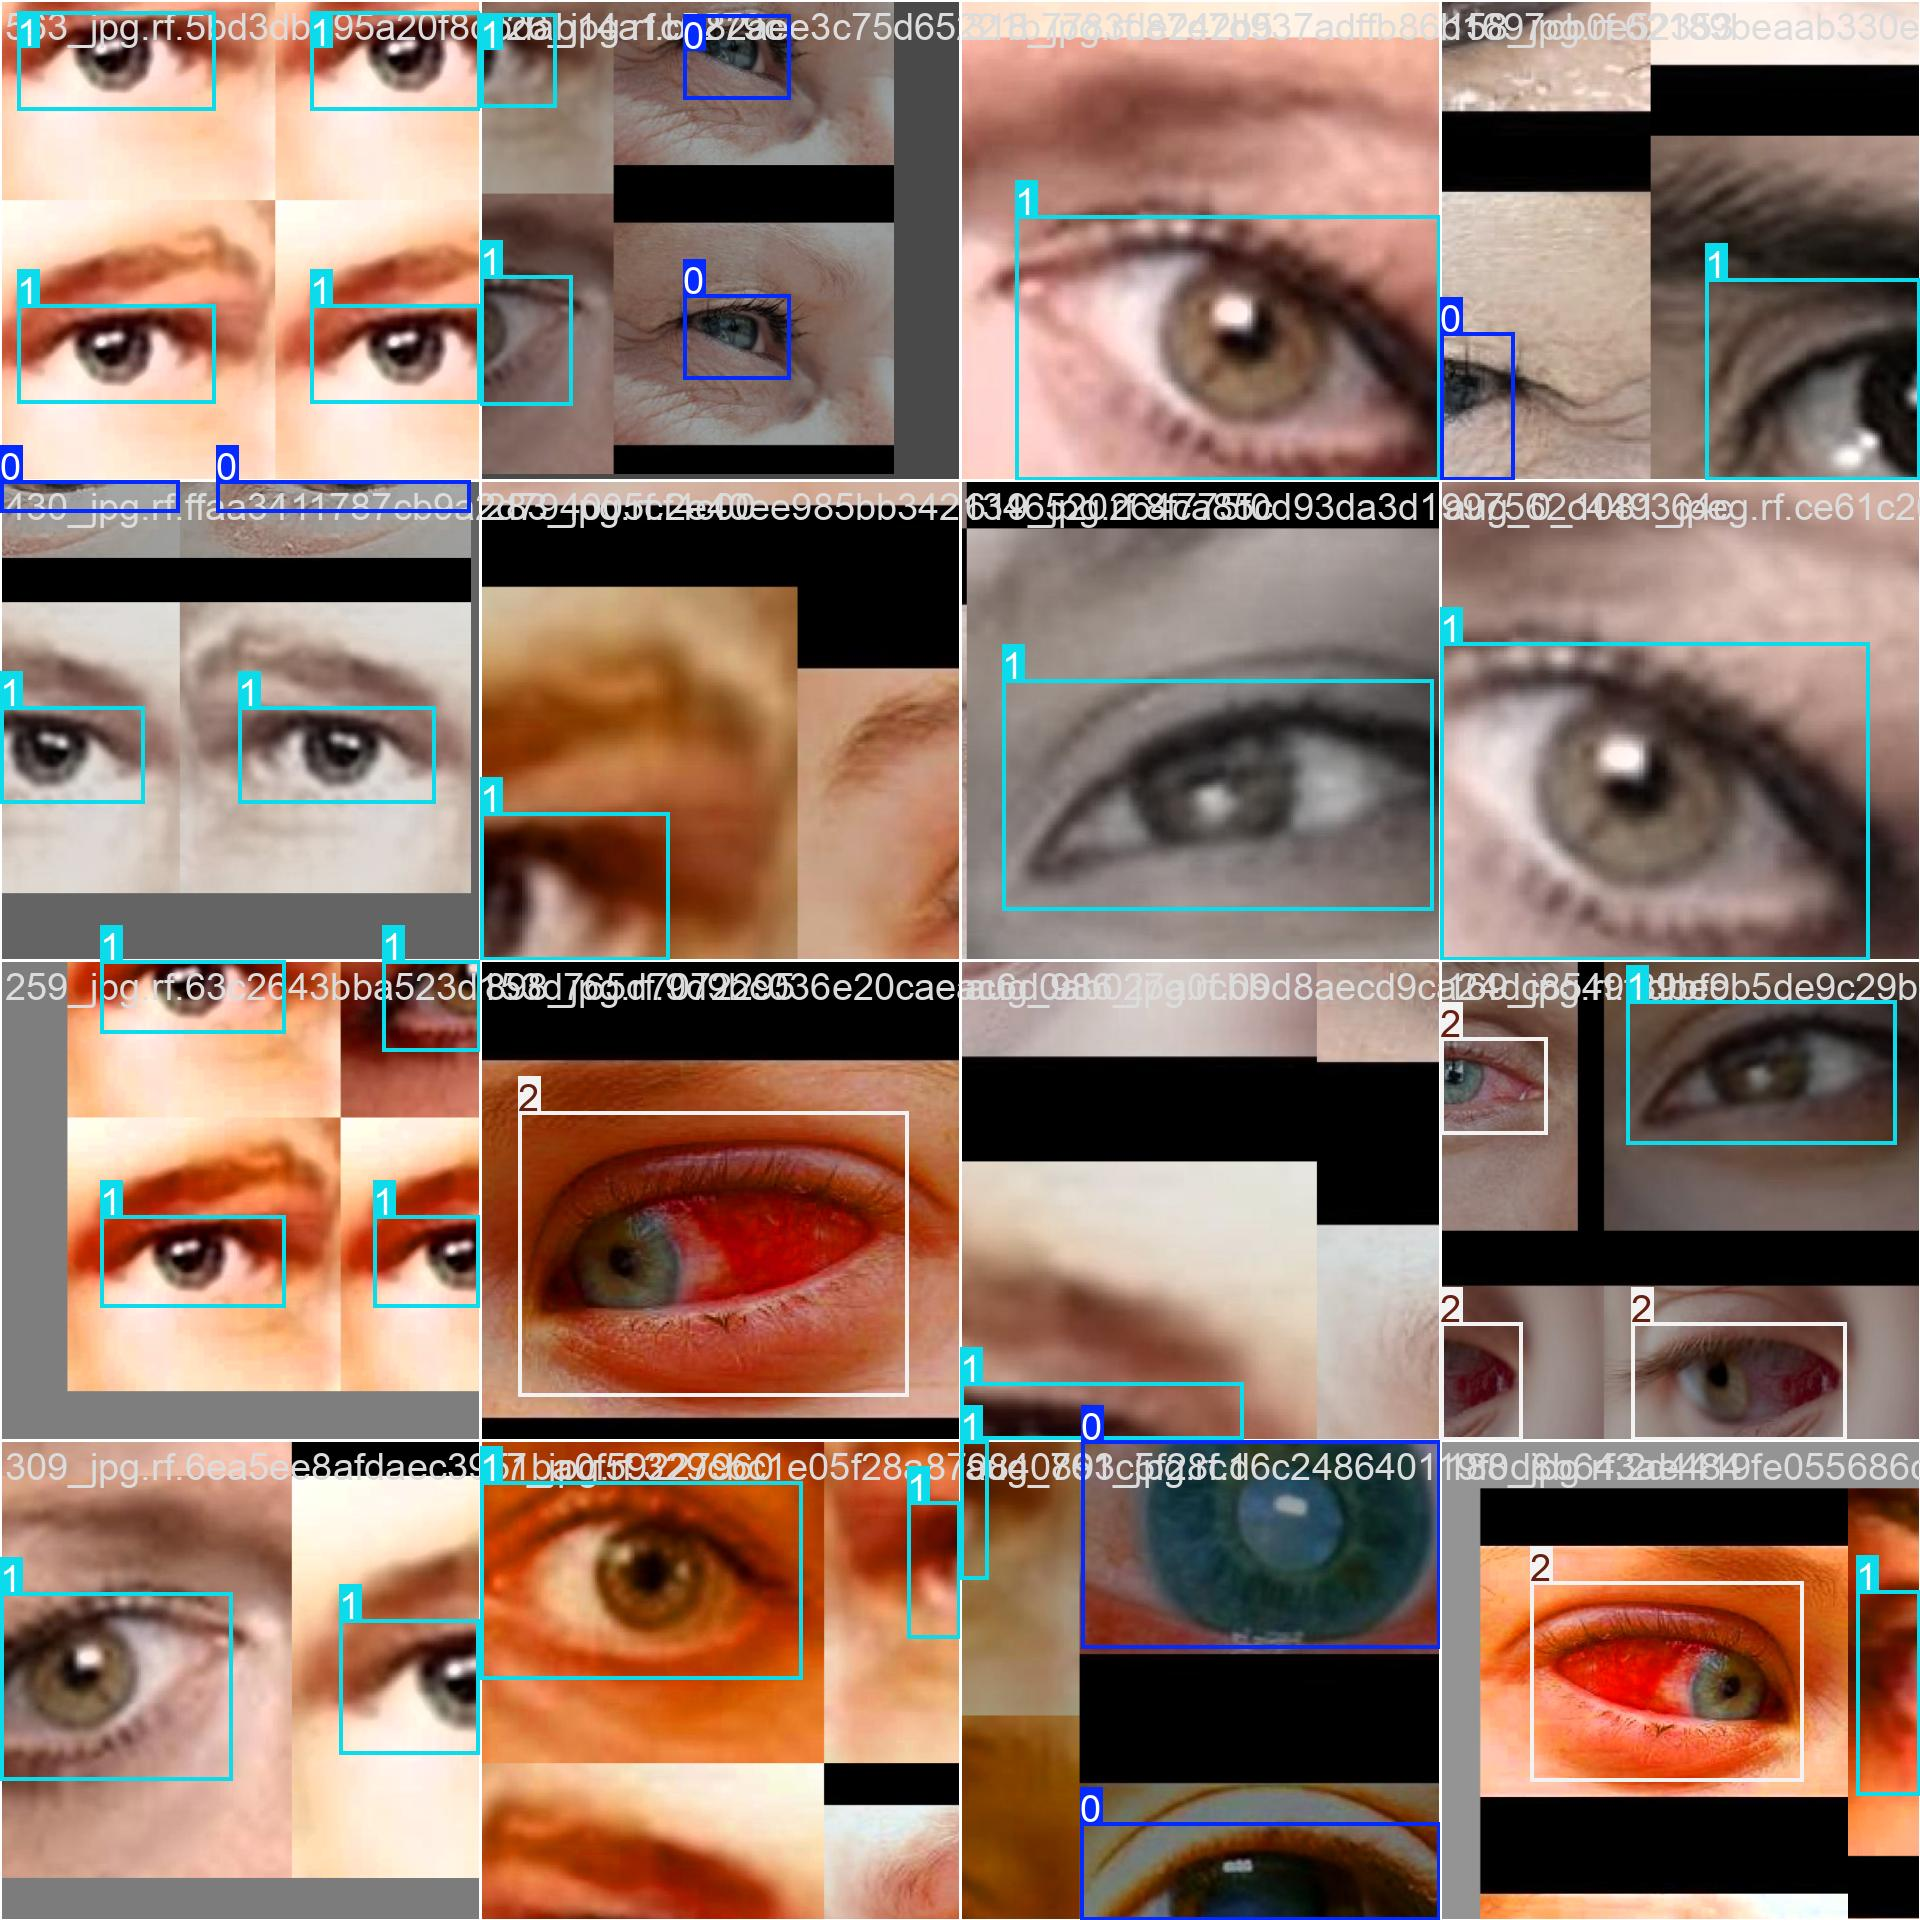

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)


In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)


FileNotFoundError: No such file or directory: '/content/runs/detect/train/val_batch0_pred.jpg'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/val_batch0_pred.jpg'

<IPython.core.display.Image object>

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)


FileNotFoundError: No such file or directory: '/content/runs/detect/train/val_batch1_pred.jpg'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/val_batch1_pred.jpg'

<IPython.core.display.Image object>

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)


FileNotFoundError: No such file or directory: '/content/runs/detect/train/val_batch2_pred.jpg'

FileNotFoundError: No such file or directory: '/content/runs/detect/train/val_batch2_pred.jpg'

<IPython.core.display.Image object>

In [ ]:
model_path = '/content/runs/detect/train/weights/best.pt'


In [ ]:
!yolo task=detect mode=val model={model_path} data={dataset.location}/data.yaml


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 954, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 79, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 151, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 295, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1549, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

In [ ]:
!yolo task=detect mode=predict model= {model_path} conf=0.25 source={dataset.location}/valid/images save=True


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 954, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 79, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 151, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 295, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1549, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")

ValueError: max() arg is an empty sequence

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

In [ ]:
image_folder = max(glob.glob('/content/runs/detect/predict3*/'), key=os.path.getmtime)
for img in glob.glob(f'{image_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
img_path = '/content/imgs'
!yolo task=detect mode=predict model= {model_path} conf=0.25 source={img_path} save=True

image_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{image_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
import cv2
import os
import glob
from IPython.display import display, Image as IPyImage

# Path ke folder gambar
img_path = '/content/images'
output_path = '/content/resized_images'

# Buat folder untuk gambar yang sudah di-resize
os.makedirs(output_path, exist_ok=True)

# Resize semua gambar ke 640x640 (ukuran standar YOLO)
for img_file in glob.glob(f'{img_path}/*.jpg'):
    img = cv2.imread(img_file)
    # Resize dengan mempertahankan aspect ratio (letterbox resize)
    h, w = img.shape[:2]
    scale = min(640/w, 640/h)
    new_w = int(w * scale)
    new_h = int(h * scale)

    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    # Tambahkan padding jika diperlukan
    top = (640 - new_h) // 2
    bottom = 640 - new_h - top
    left = (640 - new_w) // 2
    right = 640 - new_w - left
    resized_with_pad = cv2.copyMakeBorder(resized, top, bottom, left, right,
                                        cv2.BORDER_CONSTANT, value=(114,114,114))

    cv2.imwrite(f'{output_path}/{os.path.basename(img_file)}', resized_with_pad)

# Jalankan prediksi dengan gambar yang sudah di-resize
!yolo task=detect mode=predict model={model_path} conf=0.25 source={output_path} save=True

# Tampilkan hasil
image_folder = max(glob.glob('/content/runs/detect/predict7*/'), key=os.path.getmtime)
for img in glob.glob(f'{image_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
import cv2
import os
import glob
from IPython.display import display, Image as IPyImage

# Path ke folder gambar
img_path = '/content/images'
output_path = '/content/resized_images'

# Buat folder untuk gambar yang sudah di-resize
os.makedirs(output_path, exist_ok=True)

# Resize semua gambar ke 640x640 (ukuran standar YOLO)
for img_file in glob.glob(f'{img_path}/*.jpg'):
    img = cv2.imread(img_file)
    # Resize dengan mempertahankan aspect ratio (letterbox resize)
    h, w = img.shape[:2]
    scale = min(640/w, 640/h)
    new_w = int(w * scale)
    new_h = int(h * scale)

    resized = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    # Tambahkan padding jika diperlukan
    top = (640 - new_h) // 2
    bottom = 640 - new_h - top
    left = (640 - new_w) // 2
    right = 640 - new_w - left
    resized_with_pad = cv2.copyMakeBorder(resized, top, bottom, left, right,
                                        cv2.BORDER_CONSTANT, value=(114,114,114))

    cv2.imwrite(f'{output_path}/{os.path.basename(img_file)}', resized_with_pad)

# Jalankan prediksi dengan gambar yang sudah di-resize
!yolo task=detect mode=predict model={model_path} conf=0.7 iou=0.3 source={img_path} save=True
# Tampilkan hasil
image_folder = max(glob.glob('/content/runs/detect/predict8*/'), key=os.path.getmtime)
for img in glob.glob(f'{image_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
image_folder = max(glob.glob('/content/runs/detect/*'), key=os.path.getmtime)
for img in glob.glob(f'{image_folder}/*.jpg'):
    display(IPyImage(filename=img, width=600))
    print("\n")